In [1]:
source("../00_model-fitting/wwa_model-fitting.R")

## **Handy examples of things that don't really have a home anywhere else**

---
### **pdf shift plot**

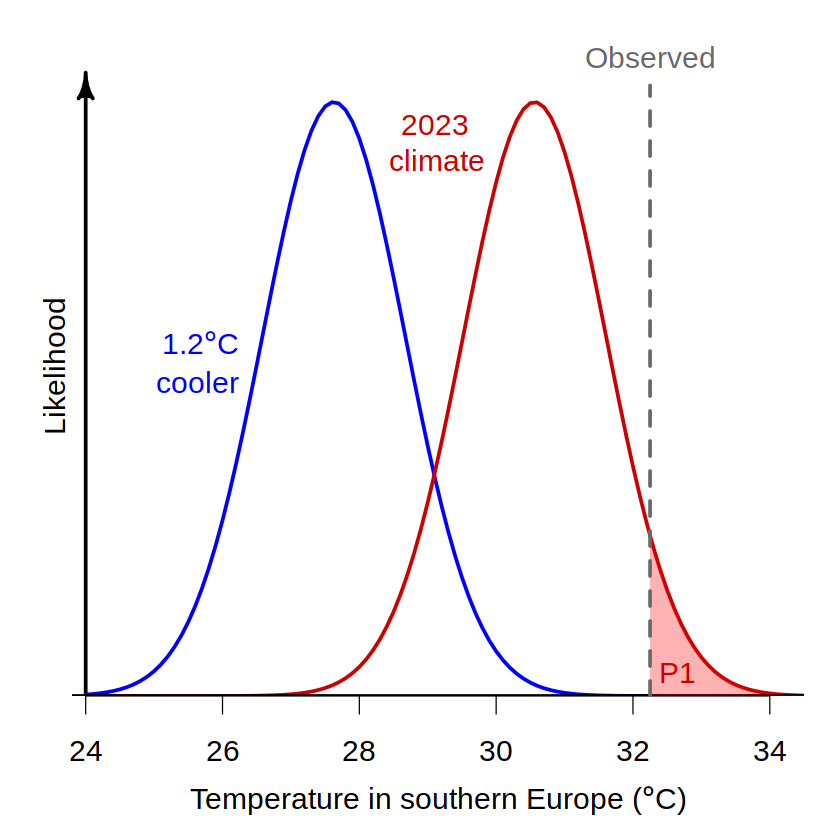

In [63]:
x <- seq(24,34.5,0.1)
xx <- seq(32.25,35,0.01)

mean_cf <- 27.628; sd_cf <- 1.043
mean_f <- 30.562; sd_f <- 1.043
obs <- 32.25

# png("pdf-shift.png", height = 480, width = 480); {

    # set plot parameters (scale text by 1.5x, set outer margins to remove whitespace)
    par(cex = 1.5, mar = c(4,2,1,1))
    
    # create an empty plot - will probably need to change height of y-axis via second value in ylim
    plot(0, type = "n", xaxs = "i", yaxs = "i", bty = "n", yaxt = "n", xlim = c(min(x) - 0.2, max(x)), ylim = c(0,0.425), xlab = "", ylab = "")
    ymax <- par("usr")[4]*0.925

    # axes & axis labels
    mtext(expression("Temperature in southern Europe ("*degree*"C)"), side = 1, line = 2.5, cex = 1.5)
    mtext("Likelihood", side = 2, cex = 1.5)
    Arrows(min(x),0,min(x),ymax, lwd = 3)

    # add lines showing counterfactual & factual densities
    lines(x, dnorm(x, mean = mean_cf, sd = sd_cf), type = "l", lwd = 3, col = "blue")
    lines(x, dnorm(x, mean = mean_f, sd = sd_f), type = "l", lwd = 3, col = "red3")
    abline(h = 0, lwd = 3)

    # add shaded polygons - currently non-overlapping 
    polygon(c(xx, rev(xx)), c(rep(0,length(xx)), rev(dnorm(xx, mean = mean_cf, sd = sd_cf))), col = adjustcolor("blue", alpha = 0.3), border = NA)
    polygon(c(xx, rev(xx)), c(dnorm(xx, mean = mean_cf, sd = sd_cf), rev(dnorm(xx, mean = mean_f, sd = sd_f))), col = adjustcolor("red", alpha = 0.3), border = NA)

    # line marking observed temperature
    lines(rep(obs,2), c(0,ymax), col = "dimgrey", lty = 2, lwd = 3)
    text(obs, ymax, "Observed", col = "dimgrey", pos = 3)
    

    # add labels (will need to play around with x & y coordinates to get best location)
    text(26.5,.225, expression("1.2"*degree*"C"), pos = 2, col = "blue")
    text(26.5,.2, expression(cooler), pos = 2, col = "blue")

    text(30.1,.35, "2023  \nclimate", pos = 2, col = "red3")

    text(32.65,.015, "P1", col = "red3")

# # }; dev.off()

---
## **Leave-one-out parameter robustness**

In [ ]:
source("../../../00_model-fitting/wwa_model-fitting.R")

df <- merge(read.csv("~/wwa/20_misc/23-04_return-level-plots/23-07_triple-heatwave/SEurope_era5ts.dat", sep = " ", comment.char = "#", header = F, col.names = c("year", "tas")),
      load_ts("../../../23-04_DRC-Rwanda-floods/ts/drc-rw-floods_gmst-smoothed.dat", col.names = c("year", "gmst")))
gmst_2023 <- df$gmst[df$year == 2023]

mdl <- fit_ns("gev", "shift", df, "tas", "gmst", lower = F)

loo_pars(mdl, rp = 10, cov = gmst_2023, cov_cf = gmst_2023 - 1.2, plot = T)

## **Difference when fitting to detrended residuals**

In [31]:
source("../00_model-fitting/wwa_model-fitting.R")

df <- merge(load_ts("~/wwa/23-09_Brazil-heatwave/ts/BrazilArgentinaParaguay-10day_heatwave_cpc_txdaily.dat", col.names = c("year", "tas")),
      gmst <- read.fwf("/home/clair/Data/gmst.dat", comment.char = "#", widths = c(5,15), col.names = c("year", "gmst")))

linear_mdl <- lm(tas ~ gmst, data = df)
df$lm_res <- linear_mdl$residuals
lm_gev <- fevd(lm_res, df)
ns_mdl <- fevd(tas, df, location.fun = ~ gmst)

In [38]:
round(linear_mdl$coefficients["gmst"],2)

gmst 
4.48

In [39]:
round(strip(ns_mdl)["mu1"],2)

mu1 
4.24

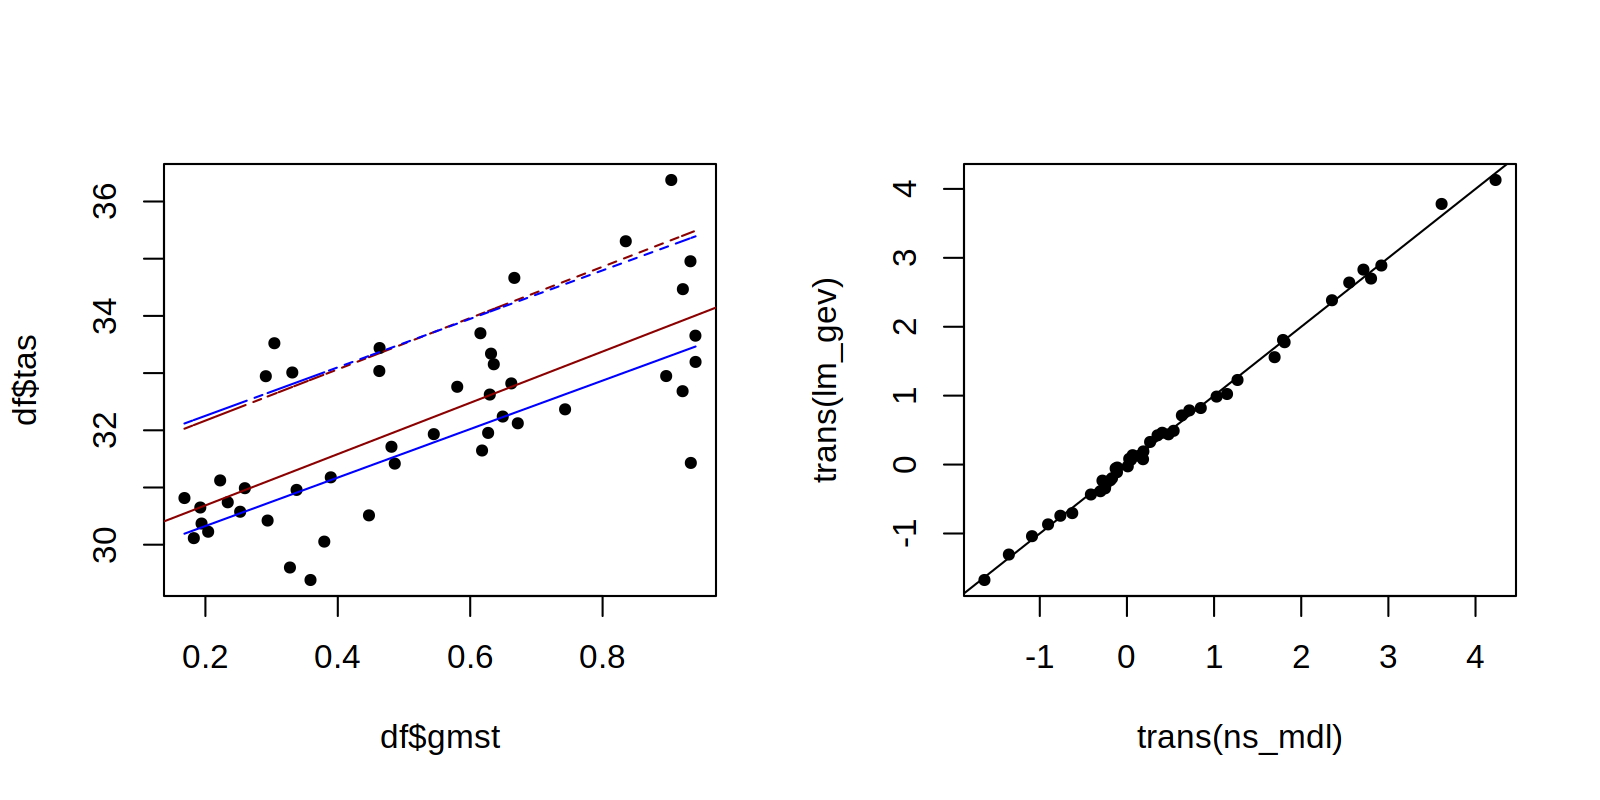

In [62]:
prep_window(c(1,2))
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# how different are the fitted trends?
plot(df$gmst, df$tas)
abline(linear_mdl, col = "darkred")
lines(df$gmst, linear_mdl$fitted + return.level(lm_gev, 10), lty = 2, col = "darkred")

lines(df$gmst, findpars(ns_mdl)$location, col = "blue")
lines(df$gmst, return.level(ns_mdl, 10), col = "blue", lty = 2)
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# check model fit
plot(trans(ns_mdl), trans(lm_gev))
abline(0,1)